In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("superbowl_all_data.csv")
dataset.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [146]:
dataset.dtypes
dataset.shape

(54, 14)

In [16]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [17]:
dataset['year'] = dataset['Date'].dt.year

In [19]:
dataset['month'] = dataset['Date'].dt.month

In [20]:
dataset['week_day'] = dataset['Date'].dt.dayofweek

In [25]:
dataset['week_day'].describe()

count    54.0
mean      6.0
std       0.0
min       6.0
25%       6.0
50%       6.0
75%       6.0
max       6.0
Name: week_day, dtype: float64

In [26]:
dataset['week_day'].unique()

array([6], dtype=int64)

### Top Winning teams

In [194]:
win_counts = dataset.groupby(['Winner'])['Date'].count().to_frame().reset_index().rename(columns={'Date': 'win_count', 'Winner': 'team'})
win_counts.sort_values('win_count', ascending=False).head()

,team,win_count
16,Pittsburgh Steelers,6
10,New England Patriots,6
3,Dallas Cowboys,5
17,San Francisco 49ers,5
5,Green Bay Packers,4


### Top Losing teams

In [195]:
lose_counts = dataset.groupby(['Loser'])['Date'].count().to_frame().reset_index().rename(columns={'Date': 'lose_count', 'Loser':'team'})
lose_counts.sort_values('lose_count', ascending=False).head()

,team,lose_count
8,Denver Broncos,5
15,New England Patriots,5
3,Buffalo Bills,4
14,Minnesota Vikings,4
13,Miami Dolphins,3


-  Here `New England Patriots` is in Both **Top Winning List** & **Top Losing List**. So Lets find out probability of wins

### Winning Probability

In [212]:
match_counts = pd.merge(win_counts, lose_counts, on='team')
match_counts['prob'] = match_counts['win_count'] / ( match_counts['win_count'] + match_counts['lose_count'])
# match_counts.sort_values('prob', ascending=False)
match_counts.sort_values('win_count', ascending=False).head()

,team,win_count,lose_count,prob
8,New England Patriots,6,5,0.545455
12,Pittsburgh Steelers,6,2,0.750000
2,Dallas Cowboys,5,3,0.625000
13,San Francisco 49ers,5,2,0.714286
9,New York Giants,4,1,0.800000


- Here `New England Patriots` are not best performers
- `Pittsburgh Steelers`, `San Francisco 49ers`, `New York Giants` are better teams 

### Find difference between winning  and losing points

In [220]:
year_set = pd.merge(
    dataset[['year','Winner', 'Winner Pts']],
    dataset[['year','Loser', 'Loser Pts']]
    , on="year")

year_set['Difference'] = year_set['Winner Pts'] - year_set['Loser Pts']
year_set.sort_values("Difference", ascending=False)

,year,Winner,Winner Pts,Loser,Loser Pts,Difference
30,1990,San Francisco 49ers,55,Denver Broncos,10,45
34,1986,Chicago Bears,46,New England Patriots,10,36
27,1993,Dallas Cowboys,52,Buffalo Bills,17,35
6,2014,Seattle Seahawks,43,Denver Broncos,8,35
32,1988,Washington Redskins,42,Denver Broncos,10,32
36,1984,Los Angeles Raiders,38,Washington Redskins,9,29
17,2003,Tampa Bay Buccaneers,48,Oakland Raiders,21,27
19,2001,Baltimore Ravens,34,New York Giants,7,27
53,1967,Green Bay Packers,35,Kansas City Chiefs,10,25
25,1995,San Francisco 49ers,49,San Diego Chargers,26,23


### Find all teams performance in each year

In [224]:
win_list = dataset[['Winner', 'year']].rename(columns={'Winner':'team' })
win_list['win_lose'] = 1
lose_list = dataset[['Loser', 'year']].rename(columns={'Loser':'team' })
lose_list['win_lose'] = 0

result = pd.concat([win_list, lose_list])
result = result.pivot_table(values='win_lose', index='team', columns='year', aggfunc=lambda x: ((x)))
# result[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']]
result

year,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
team,,,,,,,,,,,,,,,,,,,,,
Arizona Cardinals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atlanta Falcons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Baltimore Colts,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baltimore Ravens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buffalo Bills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carolina Panthers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Chicago Bears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cincinnati Bengals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dallas Cowboys,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot Heatmap of all teams performance on every year

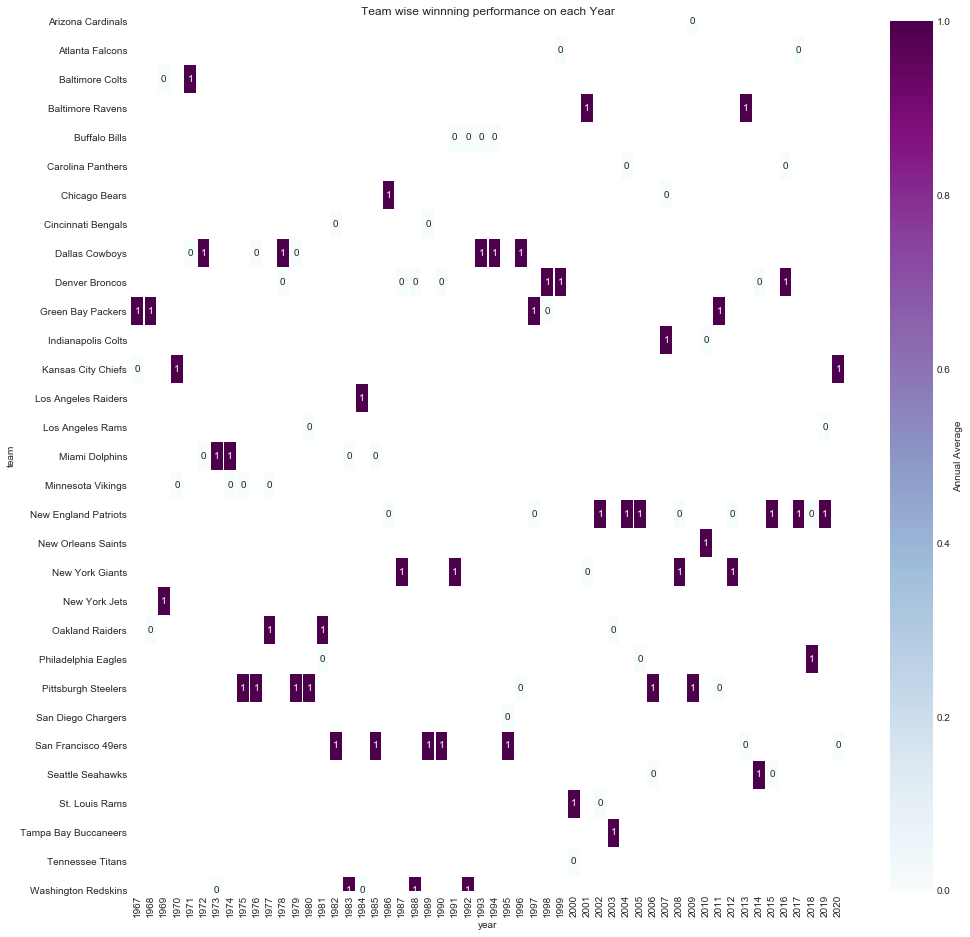

In [209]:
f, ax = plt.subplots(figsize=(16,16))
ax.set_title('Team wise winnning performance on each Year')
sns.heatmap(result,
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})


**Note**:

Here...
- blank values indicates that the team hasn't appeared in Finals
- 0 indicates Losing
- 1 nidicates Winning



## Observations

    - `Pittsburgh Steelers` & `San Francisco 49ers` were the best team in 1970's & 1980's But not now
    - `New England Patriots` are most active team in 2000's
    - `New England Patriots` are mostly appering in finals dispite of winning or losing.
